# Etivity 3 -  Yukti Patil

## 1. Import Python modules and Dataset

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy import unique
from numpy import where

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [40]:
#load dataset

df = pd.read_csv("./loans_train_prepared.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)
print(data)
df

(number of examples, number of attributes):  (614, 16)
[[0.         1.08452321 1.05814015 ... 1.         1.         0.84108572]
 [0.33333333 0.92588297 1.04731899 ... 0.         0.         0.87171097]
 [0.         0.68385824 0.63592037 ... 1.         1.         0.38518942]
 ...
 [0.33333333 1.31371906 1.56610955 ... 1.         1.         1.11607471]
 [0.66666667 1.267616   1.32567579 ... 1.         1.         1.04225648]
 [0.         0.92588297 1.07415544 ... 0.         0.         0.66352286]]


,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
0,0.000000,1.084523,1.058140,0.750,1,1,0,0,0,0,0,0,0,1,1,0.841086
1,0.333333,0.925883,1.047319,0.750,1,1,0,1,0,0,0,0,0,0,0,0.871711
2,0.000000,0.683858,0.635920,0.750,1,1,0,1,0,1,0,0,0,1,1,0.385189
3,0.000000,0.608992,1.002824,0.750,1,1,0,1,0,0,0,1,0,1,1,0.717012
4,0.000000,1.101869,1.115650,0.750,1,1,0,0,0,0,0,0,0,1,1,0.860305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.666409,0.676143,0.750,1,0,0,0,0,0,0,0,0,0,1,0.364708
610,1.000000,0.858916,0.395858,0.375,1,1,0,1,0,0,0,0,0,0,1,0.587496
611,0.333333,1.313719,1.566110,0.750,1,1,0,1,0,0,0,0,0,1,1,1.116075
612,0.666667,1.267616,1.325676,0.750,1,1,0,1,0,0,0,0,0,1,1,1.042256


## 2. Rescale the data

In [41]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

## 3. Scatterplot function 

In [42]:
#Scatterplot Function (to be used below for visualising a clustering)

colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title):
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

## 4. K-Means Clustering

In [43]:
# Fitting K-Means to the dataset
k = 2
clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(data)

In [44]:
clustered_data_sklearn.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

## 5. Applying a manifold-learning technique to project the data set to a 2D space

#### 5.1. Applying multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

In [45]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

In [46]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.


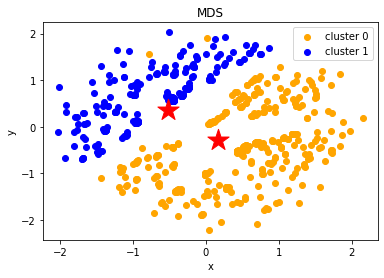

In [47]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=XYcoordinates[-k:,:], 
                       title='MDS')
print("Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.")

#### 5.2 Applying t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [48]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)

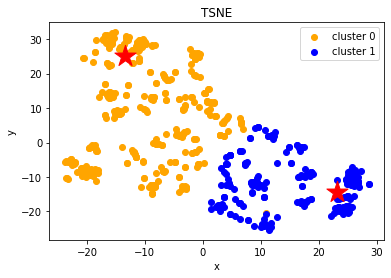

In [49]:
clustering_scatterplot(points=XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_,
                       centers=XYcoordinates[-k:,:], 
                       title='TSNE')

#### Copying the df and adding a new cluster column with label

In [50]:
df_copy = df
df_copy['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=df_copy.index)

#### Compute the mean value of each attribute for each cluster

In [51]:
df.groupby('cluster').mean()

,Dependents,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Gender_nan,Married_Yes,Married_nan,Self_Employed_Yes,Self_Employed_nan,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,TotalIncome
cluster,,,,,,,,,,,,,,,,
0,0.247594,0.918059,1.074684,0.707152,0.845144,0.832021,0.018373,0.648294,0.002625,0.131234,0.057743,0.230971,0.0,0.530184,0.637795,0.869577
1,0.248927,0.914184,1.078738,0.723498,0.871245,0.738197,0.025751,0.648069,0.008584,0.137339,0.042918,0.197425,1.0,0.000000,0.768240,0.851417


#### Conclusions from the 2 clusters
##### <u>Cluster 0 </u>
##### Applicants are from semi-urban area.
##### Cluster 0 has more Loan taken compared to Cluster 1 which can also suggest that cluster with less males have taken more loan.
##### Cluster 0 are more educated while Cluster 1 falls behind with more number of non-graduates.
##### <u>Cluster 1 </u>
##### More than half of the applicants in cluster 1 are from urban area.
##### Cluster 1 applicants have more total income compared to the Cluster 0.
##### Cluster 1 has more males compared to cluster 0.

## Checking sum of squares value
#### Inertia_ function in Python calculates the Sum of Squares (WSS) distance for all observations in the dataset with a K value of 2.

In [52]:
clustered_data_sklearn.inertia_

873.2211642146079

#### Finding out the optimal level of clusters, analyse different Sum of Squares values for different K values.

In [53]:
for i in range(3,10):
    clustered_data_sklearn = cluster.KMeans(n_clusters=i, n_init=10, max_iter=300).fit(data)
    print(" For k = " ,i," - ",clustered_data_sklearn.inertia_)

 For k =  3  -  765.7271923349015
 For k =  4  -  695.5909273777199
 For k =  5  -  641.7426770540151
 For k =  6  -  603.0465797219421
 For k =  7  -  573.662033215099
 For k =  8  -  536.8429254401486
 For k =  9  -  516.0986536644747


####  Interpreting that while the value of K increases, WSS value decreases. 
##### For finding optimal clusters:
##### Measuring the difference in the value of WSS from cluster 2 onwards is carried out to understand the fall index of the cluster comprehending the larger variance of the data. Cluster selection would depend on the business objective for the target analysis

## Elbow method

In [54]:
wss=[]
for i in range(1,11):
    KM = cluster.KMeans(n_clusters=i).fit(data)
    wss.append(KM.inertia_)
wss

[1062.5341034584592,
 873.2211642146079,
 765.7271923349015,
 695.103610371575,
 644.9119696673716,
 588.5049205203305,
 563.1865813808125,
 541.1851516396846,
 525.2282979010702,
 501.5072911473388]

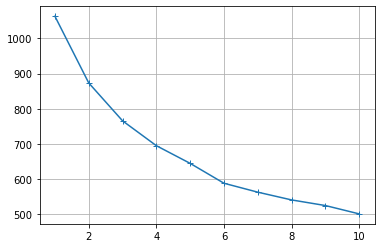

In [55]:
plt.plot(range(1,11),wss,marker='+' )
plt.grid()

##### In the above graph, we can see a sharp bend at 7
#### From the above plot, we can see that the fall of WSS values is large enough till cluster 8.

#### Finding silhouette score

In [56]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = cluster.KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil_coeff = silhouette_score(data, labels, metric = 'euclidean')
  print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.18654028464861305
For n_clusters=3, The Silhouette Coefficient is 0.18623355304670094
For n_clusters=4, The Silhouette Coefficient is 0.1809138388600152
For n_clusters=5, The Silhouette Coefficient is 0.19805036364856715
For n_clusters=6, The Silhouette Coefficient is 0.19645198600338196
For n_clusters=7, The Silhouette Coefficient is 0.20271178696873943
For n_clusters=8, The Silhouette Coefficient is 0.2122632316574483
For n_clusters=9, The Silhouette Coefficient is 0.21562687918382148
For n_clusters=10, The Silhouette Coefficient is 0.22579567098972497


##### From the Silhouette score above we can say that for k=8 with value "0.16862514756659988" is the highest and from my elbow method for which k=7, k could be 7 OR 8

## New k-means Clustering

In [57]:
new_clustered_data = cluster.KMeans(n_clusters=8, n_init=10, max_iter=300).fit(data)

##### Applying MDS method

In [58]:
new_data_and_centers = np.r_[data,new_clustered_data.cluster_centers_]

In [59]:
new_XYcoordinates = manifold.MDS(n_components=2).fit_transform(new_data_and_centers)
print("transformation complete")

transformation complete


##### Plotting the clusters

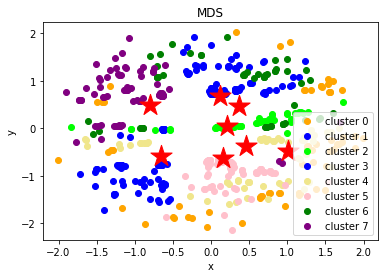

In [60]:
clustering_scatterplot(points=new_XYcoordinates[:-8,:], 
                       labels=new_clustered_data.labels_, 
                       centers=new_XYcoordinates[-8:,:], 
                       title='MDS')

##### Apply TSNE Method

In [61]:
new_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(new_data_and_centers)
print("transformation complete")

transformation complete


##### Plotting the clusters

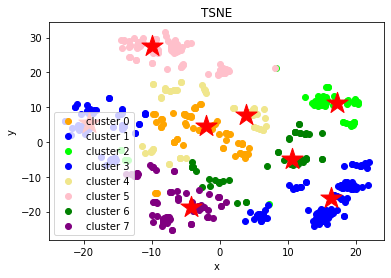

In [62]:
clustering_scatterplot(points=new_XYcoordinates[:-8,:], 
                       labels=new_clustered_data.labels_, 
                       centers=new_XYcoordinates[-8:,:], 
                       title='TSNE')

#### TSNE Method plots better compared to MDS

### APPLY NEW CLUSTERING METHOD

### Mean Shift Clustering

In [63]:
bandwidth = cluster.estimate_bandwidth(data, quantile=0.2, n_samples=500)
meanshift = cluster.MeanShift(bandwidth=bandwidth)
meanshift.fit(data)

labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

#### Number of clusters

In [64]:
print(n_clusters_)

1


In [36]:
data_and_centers_MEANSHIFT = np.r_[data,meanshift.cluster_centers_]

##### Applying TSNE method

In [37]:
XYcoordinates_MEANSHIFT = manifold.TSNE(n_components=2).fit_transform(data_and_centers_MEANSHIFT)
print("transformation complete")

transformation complete


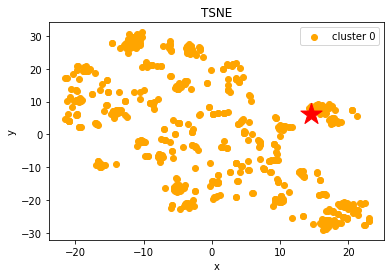

In [65]:
clustering_scatterplot(points=XYcoordinates_MEANSHIFT[:-1,:], 
                       labels=meanshift.labels_, 
                       centers=XYcoordinates_MEANSHIFT[-1:,:], 
                       title='TSNE')

### As it wasn't the best suit for this dataset, Trying the Agglomerative Clustering

In [66]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(12,6))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(labels[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})
    
    plt.title(title, size=24)

In [67]:
#Setting k value from the elbow and silhouette method
k = 8
linkage = 'average'

In [68]:
DATA = manifold.SpectralEmbedding(n_components=2).fit_transform(data)
print("transformation complete")

transformation complete


In [69]:
clustering = cluster.AgglomerativeClustering(linkage=linkage, n_clusters=k).fit(DATA)

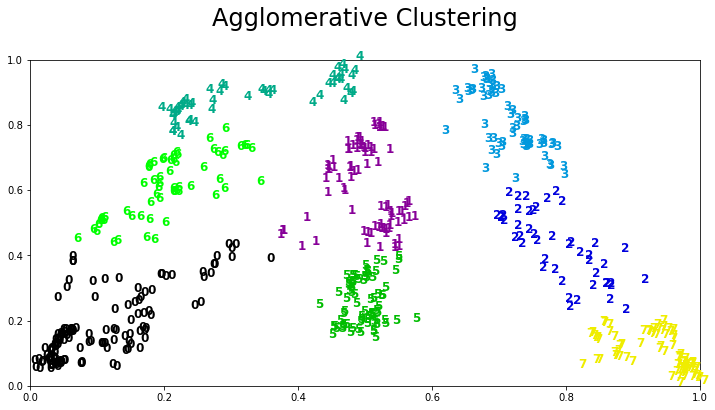

In [70]:
plot_clustering(DATA, clustering.labels_, "Agglomerative Clustering\n")
plt.show()